# EDA Case Study for Loan Calculation

In [1]:
# pip install jovian --upgrade

### Importing Required packages

In [2]:
import jovian
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Reading dataset

In [3]:
application_data=pd.read_csv("application_data.csv")
previous_application=pd.read_csv("previous_application.csv")

### Checking the size of dataset

In [4]:
application_data.shape

(307511, 122)

In [5]:
previous_application.shape

(1670214, 37)

### Handling the missing data

#### Analysing missing values

In [6]:
(100*application_data.isnull().sum()/len(application_data)).round(2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [7]:
(100*previous_application.isnull().sum()/len(previous_application)).round(2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

#### Removing the missing values columns having more than 40%

In [8]:
application_data=application_data.loc[:, application_data.isnull().mean() <=0.4]

In [9]:
application_data.shape

(307511, 73)

In [10]:
#Impute categorical data with mode
application_data.fillna(application_data.select_dtypes(include='object').mode().iloc[0], inplace=True)

In [11]:
#Impute numerical data with median
application_data.fillna(application_data.select_dtypes(include='number').median().iloc[0], inplace=True)

In [12]:
(100*application_data.isnull().sum()/len(application_data)).round(2)

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
AMT_ANNUITY                    0.0
AMT_GOODS_PRICE                0.0
NAME_TYPE_SUITE                0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
REGION_POPULATION_RELATIVE     0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_REGISTRATION              0.0
DAYS_ID_PUBLISH                0.0
FLAG_MOBIL                     0.0
FLAG_EMP_PHONE                 0.0
FLAG_WORK_PHONE                0.0
FLAG_CONT_MOBILE               0.0
FLAG_PHONE                     0.0
FLAG_EMAIL                     0.0
OCCUPATION_TYPE                0.0
CNT_FAM_MEMBERS     

In [13]:
previous_application=previous_application.loc[:, previous_application.isnull().mean() <=0.4]

In [14]:
previous_application.shape

(1670214, 26)

In [15]:
#Impute categorical data with mode
previous_application.fillna(previous_application.select_dtypes(include='object').mode().iloc[0], inplace=True)

In [16]:
#Impute numerical data with median
previous_application.fillna(previous_application.select_dtypes(include='number').median().iloc[0], inplace=True)

In [17]:
(100*previous_application.isnull().sum()/len(application_data)).round(2)

SK_ID_PREV                     0.0
SK_ID_CURR                     0.0
NAME_CONTRACT_TYPE             0.0
AMT_ANNUITY                    0.0
AMT_APPLICATION                0.0
AMT_CREDIT                     0.0
AMT_GOODS_PRICE                0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
FLAG_LAST_APPL_PER_CONTRACT    0.0
NFLAG_LAST_APPL_IN_DAY         0.0
NAME_CASH_LOAN_PURPOSE         0.0
NAME_CONTRACT_STATUS           0.0
DAYS_DECISION                  0.0
NAME_PAYMENT_TYPE              0.0
CODE_REJECT_REASON             0.0
NAME_CLIENT_TYPE               0.0
NAME_GOODS_CATEGORY            0.0
NAME_PORTFOLIO                 0.0
NAME_PRODUCT_TYPE              0.0
CHANNEL_TYPE                   0.0
SELLERPLACE_AREA               0.0
NAME_SELLER_INDUSTRY           0.0
CNT_PAYMENT                    0.0
NAME_YIELD_GROUP               0.0
PRODUCT_COMBINATION            0.0
dtype: float64

#### Checking Data types of columns

In [18]:
application_data.select_dtypes(include='object').columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'], dtype='object')

In [19]:
application_data.select_dtypes(include='object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
dtype: int64

In [20]:
application_data.select_dtypes(include='number').columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG

In [21]:
application_data.select_dtypes(include='number').apply(pd.Series.nunique, axis = 0)

SK_ID_CURR                     307511
TARGET                              2
CNT_CHILDREN                       15
AMT_INCOME_TOTAL                 2548
AMT_CREDIT                       5603
AMT_ANNUITY                     13673
AMT_GOODS_PRICE                  1003
REGION_POPULATION_RELATIVE         81
DAYS_BIRTH                      17460
DAYS_EMPLOYED                   12574
DAYS_REGISTRATION               15688
DAYS_ID_PUBLISH                  6168
FLAG_MOBIL                          2
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL                          2
CNT_FAM_MEMBERS                    18
REGION_RATING_CLIENT                3
REGION_RATING_CLIENT_W_CITY         3
HOUR_APPR_PROCESS_START            24
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT

In [22]:
previous_application.select_dtypes(include='object').columns

Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'], dtype='object')

In [23]:
previous_application.select_dtypes(include='object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE              4
WEEKDAY_APPR_PROCESS_START      7
FLAG_LAST_APPL_PER_CONTRACT     2
NAME_CASH_LOAN_PURPOSE         25
NAME_CONTRACT_STATUS            4
NAME_PAYMENT_TYPE               4
CODE_REJECT_REASON              9
NAME_CLIENT_TYPE                4
NAME_GOODS_CATEGORY            28
NAME_PORTFOLIO                  5
NAME_PRODUCT_TYPE               3
CHANNEL_TYPE                    8
NAME_SELLER_INDUSTRY           11
NAME_YIELD_GROUP                5
PRODUCT_COMBINATION            17
dtype: int64

In [24]:
previous_application.select_dtypes(include='number').columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT'], dtype='object')

In [25]:
previous_application.select_dtypes(include='number').apply(pd.Series.nunique, axis = 0)

SK_ID_PREV                 1670214
SK_ID_CURR                  338857
AMT_ANNUITY                 357960
AMT_APPLICATION              93885
AMT_CREDIT                   86804
AMT_GOODS_PRICE              93886
HOUR_APPR_PROCESS_START         24
NFLAG_LAST_APPL_IN_DAY           2
DAYS_DECISION                 2922
SELLERPLACE_AREA              2097
CNT_PAYMENT                     50
dtype: int64

#### Handling data discrepancy

In [26]:
def convertFlagCols( dataset,columns):
    for y in columns:
        dataset.loc[:,y].replace((0, 1), ('N', 'Y'), inplace=True)
    return dataset

In [27]:
convertFlagCols(application_data,application_data.filter(regex='FLAG|TARGET').columns)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,Y,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Y,Y,N,Y,Y,N,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,N,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Y,Y,N,Y,Y,N,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,278202.000000,1.0,0.0,1.0,0.0,-828.0,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,N,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Y,Y,Y,Y,Y,N,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,N,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Y,Y,N,Y,N,N,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,278202.000000,2.0,0.0,2.0,0.0,-617.0,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,278202.0,278202.0,278202.0,278202.0,278202.0,278202.0
4,100007,N,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Y,Y,N,Y,N,N,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,278202.000000,0.0,0.0,0.0,0.0,-1106.0,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,N,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,Y,Y,N,Y,N,N,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.681632,278202.000000,0.0,0.0,0.0,0.0,-273.0,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,278202.0,278202.0,278202.0,278202.0,278202.0,278202.0
307507,456252,N,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House

In [28]:
convertFlagCols(previous_application,previous_application.filter(regex='FLAG|TARGET').columns)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,Y,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,Y,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,Y,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,Y,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,Y,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,267295.5,WEDNESDAY,12,Y,Y,XAP,Approved,-544,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,87750.0,TUESDAY,15,Y,Y,XAP,Approved,-1694,Cash through the bank,XAP,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,105237.0,MONDAY,12,Y,Y,XAP,Approved,-1488,Cash through the bank,XAP,Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,180000.0,WEDNESDAY,9,Y,Y,XNA,Approved,-1185,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low


In [29]:
def covertDateColsAbs(dataset,columns):
    for i in columns:
        dataset.loc[:,i]=abs(dataset.loc[:,i])
    return dataset

In [30]:
covertDateColsAbs(application_data,application_data.filter(regex='DAYS|days').columns)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,Y,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Y,Y,N,Y,Y,N,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,N,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Y,Y,N,Y,Y,N,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,278202.000000,1.0,0.0,1.0,0.0,828.0,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,N,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Y,Y,Y,Y,Y,N,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,N,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Y,Y,N,Y,N,N,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,278202.000000,2.0,0.0,2.0,0.0,617.0,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,278202.0,278202.0,278202.0,278202.0,278202.0,278202.0
4,100007,N,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Y,Y,N,Y,N,N,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,278202.000000,0.0,0.0,0.0,0.0,1106.0,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,N,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,9327,236,8456.0,1982,Y,Y,N,Y,N,N,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.681632,278202.000000,0.0,0.0,0.0,0.0,273.0,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,278202.0,278202.0,278202.0,278202.0,278202.0,278202.0
307507,456252,N,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,20775,36

In [31]:
covertDateColsAbs(previous_application,previous_application.filter(regex='DAYS|days').columns)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,Y,XAP,Approved,73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,Y,XNA,Approved,164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,Y,XNA,Approved,301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,Y,XNA,Approved,512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,Y,Repairs,Refused,781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,267295.5,WEDNESDAY,12,Y,Y,XAP,Approved,544,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,87750.0,TUESDAY,15,Y,Y,XAP,Approved,1694,Cash through the bank,XAP,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,105237.0,MONDAY,12,Y,Y,XAP,Approved,1488,Cash through the bank,XAP,Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,180000.0,WEDNESDAY,9,Y,Y,XNA,Approved,1185,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low


In [32]:
def removeXNA(dataset):
    for y in dataset.columns:
        dataset.loc[:,y]=dataset.loc[:,y].drop(dataset[dataset[y]=='XNA'].index)
        dataset.loc[:,y]=dataset.loc[:,y].drop(dataset[dataset[y]=='XAP'].index)
    return dataset

In [33]:
removeXNA(application_data)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,Y,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Y,Y,N,Y,Y,N,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,N,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Y,Y,N,Y,Y,N,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,278202.000000,1.0,0.0,1.0,0.0,828.0,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,N,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Y,Y,Y,Y,Y,N,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,N,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Y,Y,N,Y,N,N,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,278202.000000,2.0,0.0,2.0,0.0,617.0,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,278202.0,278202.0,278202.0,278202.0,278202.0,278202.0
4,100007,N,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Y,Y,N,Y,N,N,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,278202.000000,0.0,0.0,0.0,0.0,1106.0,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,N,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,9327,236,8456.0,1982,Y,Y,N,Y,N,N,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.681632,278202.000000,0.0,0.0,0.0,0.0,273.0,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,278202.0,278202.0,278202.0,278202.0,278202.0,278202.0
307507,456252,N,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,20775,36

In [34]:
removeXNA(previous_application)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,Y,NaN,Approved,73,Cash through the bank,NaN,Repeater,Mobile,POS,NaN,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,Y,NaN,Approved,164,NaN,NaN,Repeater,NaN,Cash,x-sell,Contact center,-1,NaN,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,Y,NaN,Approved,301,Cash through the bank,NaN,Repeater,NaN,Cash,x-sell,Credit and cash offices,-1,NaN,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,Y,NaN,Approved,512,Cash through the bank,NaN,Repeater,NaN,Cash,x-sell,Credit and cash offices,-1,NaN,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,Y,Repairs,Refused,781,Cash through the bank,HC,Repeater,NaN,Cash,walk-in,Credit and cash offices,-1,NaN,24.0,high,Cash Street: high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,267295.5,WEDNESDAY,12,Y,Y,NaN,Approved,544,Cash through the bank,NaN,Refreshed,Furniture,POS,NaN,Stone,43,Furniture,30.0,low_normal,POS industry with interest
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,87750.0,TUESDAY,15,Y,Y,NaN,Approved,1694,Cash through the bank,NaN,New,Furniture,POS,NaN,Stone,43,Furniture,12.0,middle,POS industry with interest
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,105237.0,MONDAY,12,Y,Y,NaN,Approved,1488,Cash through the bank,NaN,Repeater,Consumer Electronics,POS,NaN,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,180000.0,WEDNESDAY,9,Y,Y,NaN,Approved,1185,Cash through the bank,NaN,Repeater,NaN,Cash,x-sell,AP+ (Cash loan),-1,NaN,12.0,low_normal,Cash X-Sell: low


#### Bining of Columns for analysis

In [35]:
application_data['Age Group']=application_data['DAYS_BIRTH'].apply(lambda x : 'Senior Citizen' if x > 21899 else ('Youngster' if x < 9126 else 'Adult'))

In [36]:
application_data.loc[:,'INCOME_RANGE']=pd.qcut(application_data.loc[:,'AMT_INCOME_TOTAL'],q=[0,0.25,0.50,0.75,1],labels=['Low','Medium','High','Very_High'])

In [37]:
application_data.loc[:,'Rating2']=pd.qcut(application_data.loc[:,'EXT_SOURCE_2'],q=[0,0.20,0.50,0.90,1],
labels=['Low','Medium','High','Very_High'])

### Univariate analysis for Numerical variables for Application_Data

#### Checking Outliers

In [38]:
application_data.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.417052,1.687979e+05,5.990260e+05,27118.372327,5.381610e+05,0.020868,16036.995067,67724.742149,4986.120328,2994.202373,3.962031,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.976084e+02,55154.810328,925.105593,923.831014,925.088696,923.787786,963.760347,37561.812556,37561.813073,37561.836741,37562.038311,37562.036649,37563.450465
std,102790.175348,0.722121,2.371231e+05,4.024908e+05,14578.081287,3.693622e+05,0.013831,4363.988632,139443.751806,3522.886321,1509.450419,709.481718,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.287464e+04,110914.613561,16003.652353,16003.725745,16003.653325,16003.728238,966.207712,95073.179537,95073.179333,95073.169983,95073.090349,95073.091005,95072.532441
min,100002.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,12413.000000,933.000000,2010.000000,1720.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.929737e-01,0.417100,0.000000,0.000000,0.000000,0.000000,274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,278202.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,15750.000000,2219.000000,4504.000000,3254.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.664502e-01,0.604113,0.000000,0.000000,0.000000,0.000000,757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367142.500000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,19682.000000,5707.000000,7479.500000,4299.000000,3.000000,2.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.642124e-01,0.773896,2.000000,0.000000,2.000000,0.000000,1570.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000
max,456255.000000,19.000000,1.170000e+08,4.050000e+06,278202.000000,4.050000e+06,0.072508,25229.000000,365243.000000,24672.000000,7197.000000,278202.000000,3.000000,3.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.782020e+05,278202.000000,278202.000000,278202.000000,278202.000000,278202.000000,278202.000000,278202.000000,278202.000000,278202.000000,278202.000000,278202.000000,278202.000000


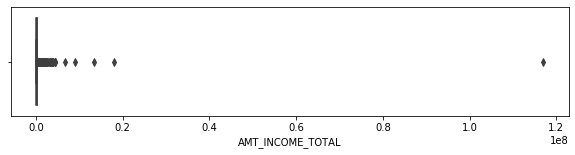

In [39]:
plt.figure(figsize=(10,2))
sns.boxplot(application_data.AMT_INCOME_TOTAL)
plt.show()

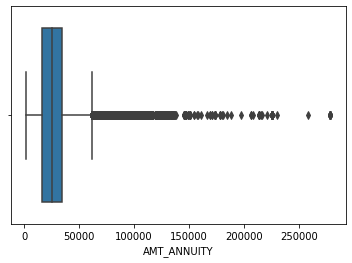

In [40]:
sns.boxplot(application_data.AMT_ANNUITY)
plt.show()

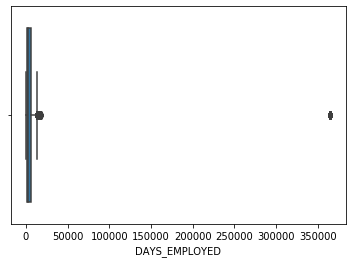

In [41]:
sns.boxplot(application_data.DAYS_EMPLOYED)
plt.show()

#### Observation
1. The one outlier point is actually a junk value 35000 days which is impossible hence we imputed with 99 percentile.

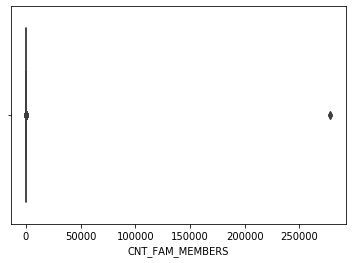

In [42]:
sns.boxplot(application_data.CNT_FAM_MEMBERS)
plt.show()

#### Treatment of Outliers

In [43]:
#Excluding values outside 99%ile in each of the 3 variables
application_data=application_data[application_data.AMT_ANNUITY<np.nanpercentile(application_data['AMT_ANNUITY'], 99)]
application_data=application_data[application_data.DAYS_EMPLOYED<np.nanpercentile(application_data['DAYS_EMPLOYED'], 99)]
application_data=application_data[application_data.AMT_INCOME_TOTAL<np.nanpercentile(application_data['AMT_INCOME_TOTAL'], 99)]
application_data=application_data[application_data.CNT_FAM_MEMBERS<np.nanpercentile(application_data['CNT_FAM_MEMBERS'], 99)]

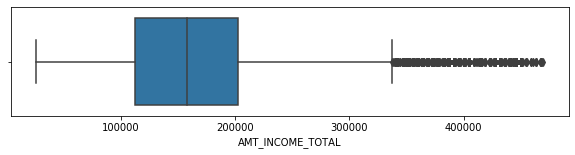

In [44]:
plt.figure(figsize=(10,2))
sns.boxplot(application_data.AMT_INCOME_TOTAL)
plt.show()

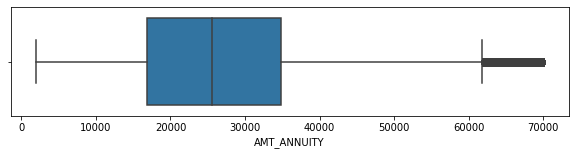

In [45]:
plt.figure(figsize=(10,2))
sns.boxplot(application_data.AMT_ANNUITY)
plt.show()

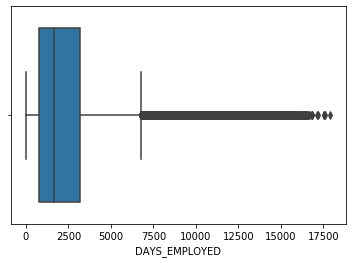

In [46]:
sns.boxplot(application_data.DAYS_EMPLOYED)
plt.show()

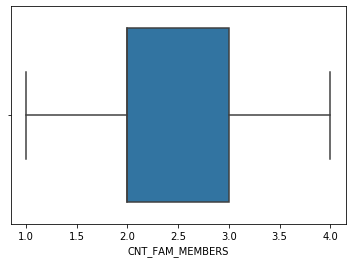

In [47]:
sns.boxplot(application_data.CNT_FAM_MEMBERS)
plt.show()

#### Imbalance Check

In [48]:
#Checking imbalance in Target column
application_data['TARGET'].value_counts(normalize=True) * 100

N    91.280144
Y     8.719856
Name: TARGET, dtype: float64

In [49]:
#Checking imbalance in Gender column
application_data['CODE_GENDER'].value_counts(normalize=True) * 100

F    62.656199
M    37.343801
Name: CODE_GENDER, dtype: float64

In [50]:
#Checking imbalance in Age Group column
application_data['Age Group'].value_counts(normalize=True) * 100

Adult             92.644923
Youngster          4.952622
Senior Citizen     2.402456
Name: Age Group, dtype: float64

In [51]:
#Checking imbalance in Income_Range column
application_data['INCOME_RANGE'].value_counts(normalize=True) * 100

Low          29.568842
High         28.600289
Very_High    24.064877
Medium       17.765992
Name: INCOME_RANGE, dtype: float64

In [52]:
application_data['Rating2'].value_counts(normalize=True) * 100

High         40.197002
Medium       30.459219
Low          19.646729
Very_High     9.697049
Name: Rating2, dtype: float64

In [53]:
application_data_T0 =application_data[application_data.TARGET=='N']
application_data_T1=application_data[application_data.TARGET=='Y']

### Univariate analysis for categorical Data for Application_Data

#### Analysis with respect to TAGET 0 and TARGET 1 for categorical variables

In [121]:
def plotUnivarAnalysis(columnName):
    sns.set_palette("muted")
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    ax=sns.countplot(columnName, data=application_data_T0.sort_values(by=[columnName]))
    plt.title('Distribution of '+'%s' %columnName+' for Non-Defaulters', fontsize=14)
    plt.xlabel(columnName)
    plt.xticks(rotation=90)
    plt.ylabel('Number of cases for non-defaulters')
    for p in ax.patches:
        ax.annotate(f'{(p.get_height()/len(application_data_T0)):.2%}', (p.get_x()+0.1, p.get_height()+50),rotation=90)
        
    plt.subplot(1, 2, 2)
    ax=sns.countplot(columnName, data=application_data_T1.sort_values(by=[columnName]))
    plt.title('Distribution of '+'%s' %columnName+' for Defaulters', fontsize=14)
    plt.xlabel(columnName)
    plt.xticks(rotation=90)
    plt.ylabel('Number of cases for defaulters')
    for p in ax.patches:
        ax.annotate(f'{(p.get_height()/len(application_data_T1)):.2%}', (p.get_x()+0.1, p.get_height()+50),rotation=90)
    plt.show()    

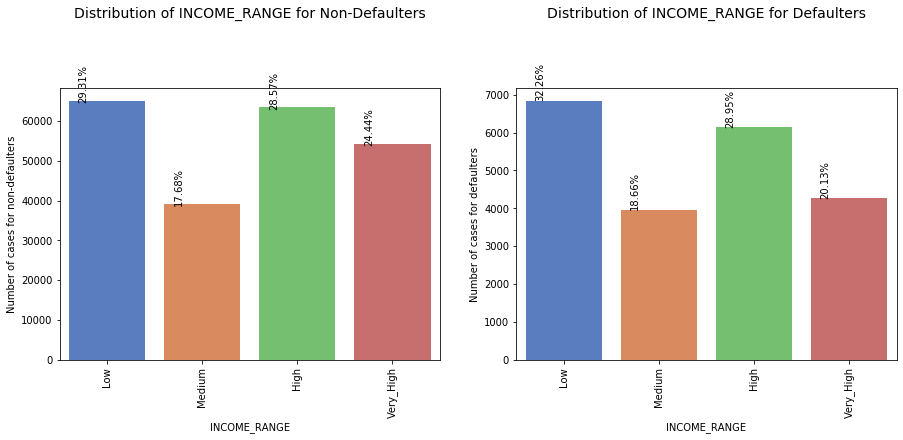

In [122]:
plotUnivarAnalysis('INCOME_RANGE')

 #### Observation
 1. Max defaulter people (>32%) who default are from low income groups.
 2. very_high income group people are less Defaulters, might be they are not requiring loans.

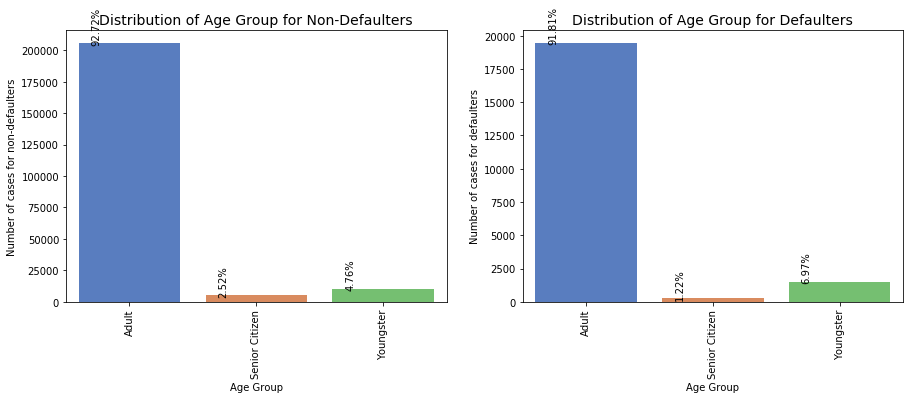

In [56]:
plotUnivarAnalysis('Age Group')

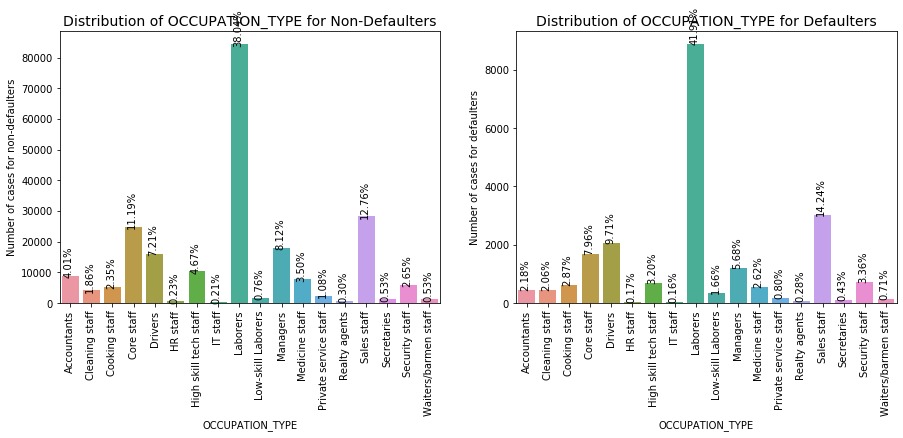

In [57]:
plotUnivarAnalysis('OCCUPATION_TYPE')

#### Observations
1. Amongs the defaulters,the percentage of defaulters is minimum in IT Staffs,HR Staffs,Private Service Staff,Waters/Barman as those are salaried jobs as well aware of banking processes.

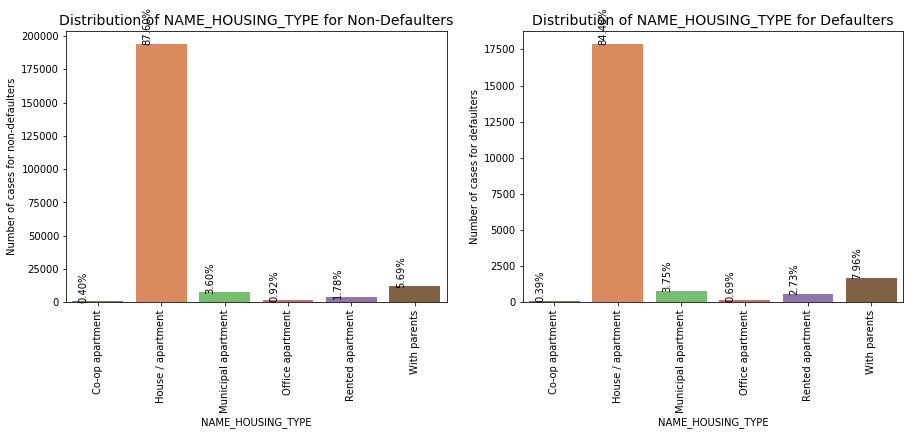

In [58]:
plotUnivarAnalysis('NAME_HOUSING_TYPE')

#### Observation
1. Amongs the Defaulter Population, living in Rented apartments have higher default rate.

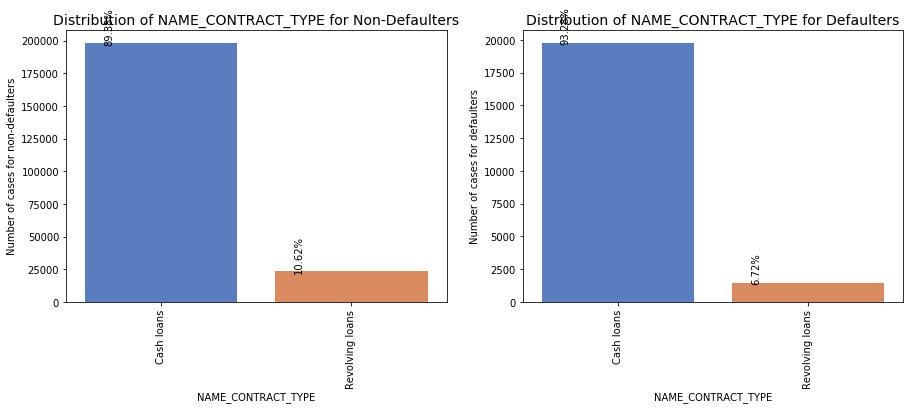

In [59]:
plotUnivarAnalysis('NAME_CONTRACT_TYPE')

#### Observations
1. Among the defaulters, 93% people are default who take cash loan.

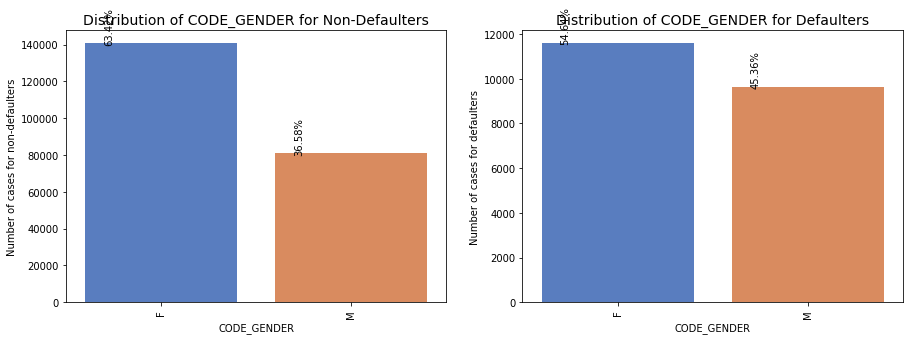

In [60]:
plotUnivarAnalysis('CODE_GENDER')

#### Observations

1. Amongs non defaulter, 63% are Female so females are less risky for company.

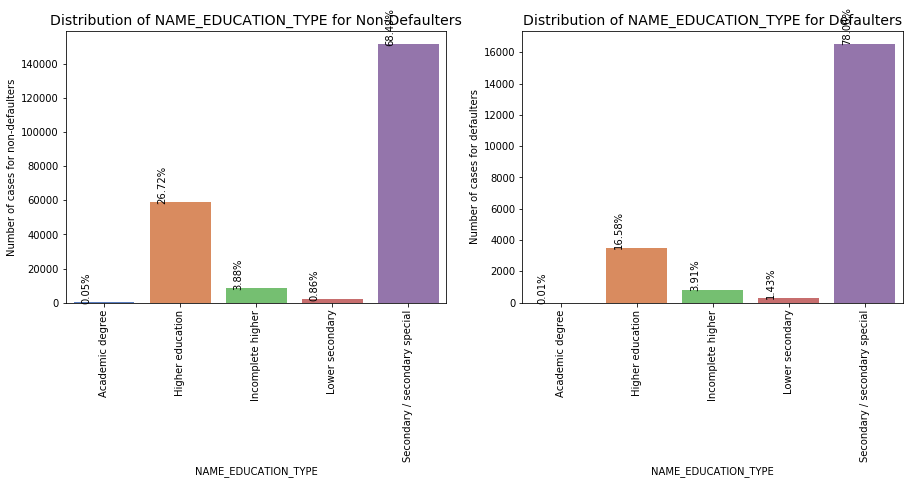

In [61]:
plotUnivarAnalysis('NAME_EDUCATION_TYPE')

#### Observations

Education plays vital role in Defaulter analysis, 
    1. Amongs the non defaulters approx 27% people don't default are from "Higher Education" whereas amongs the defaulters group people only 16% people who defaults are from Higher Education.

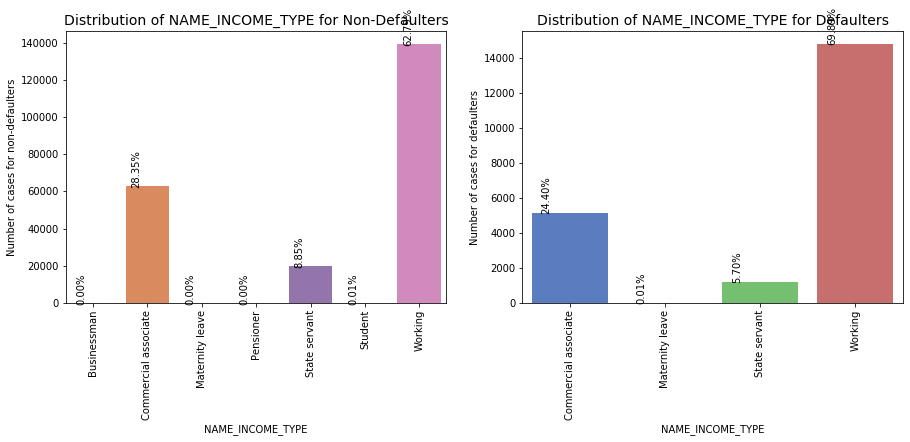

In [62]:
plotUnivarAnalysis('NAME_INCOME_TYPE')

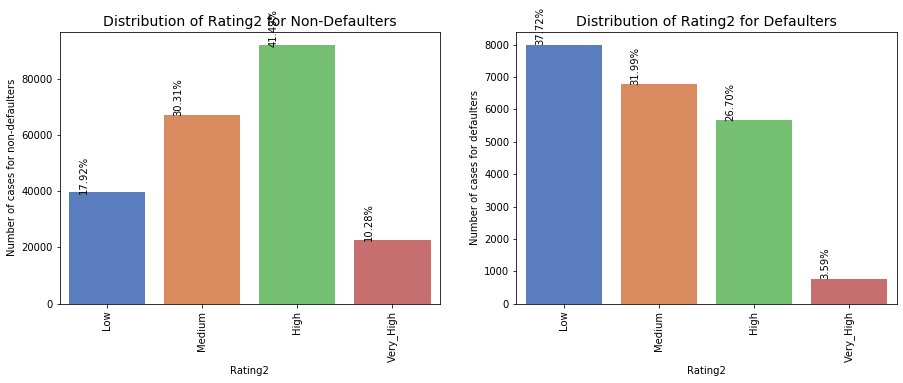

In [63]:
plotUnivarAnalysis('Rating2')

#### Obseravtion
1. Defaulters are the people have low rating and Very Few defaulters are there very_High rating

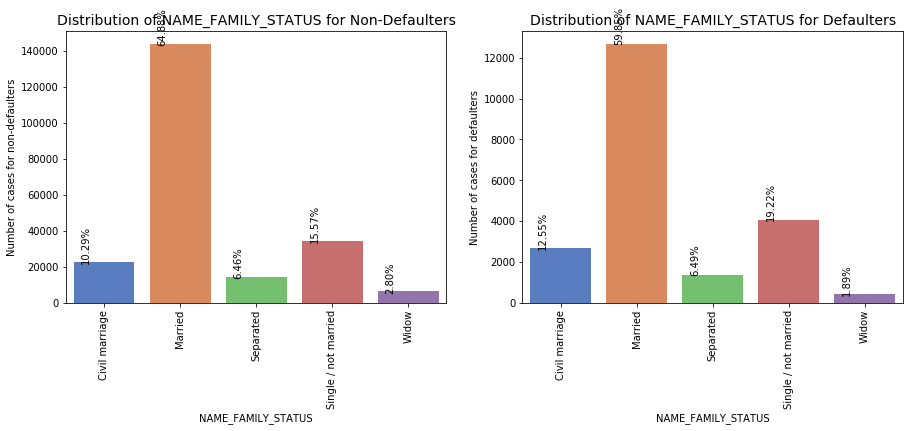

In [64]:
plotUnivarAnalysis('NAME_FAMILY_STATUS')

#### Observation
1. Among the Defaulters,married is higher in the population.

#### Finding correlation for target value 1 and 0 in Application_Data

In [65]:
Numeric_col_T0=application_data_T0.select_dtypes(include='number')
Numeric_col_T0 = Numeric_col_T0.corr()
round(Numeric_col_T0, 3)


,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000,0.002,0.002,0.000,0.001,0.000,0.000,0.001,0.000,-0.001,-0.001,0.001,-0.000,-0.001,-0.000,0.000,0.002,0.004,-0.003,-0.002,0.000,-0.002,-0.001,0.001,0.001,0.001,0.001,-0.002,0.002,0.002,0.002,0.002,0.002,0.002
CNT_CHILDREN,0.002,1.000,-0.017,-0.021,-0.011,-0.024,-0.028,-0.253,-0.068,-0.159,0.117,0.871,0.035,0.034,-0.030,-0.022,-0.015,-0.006,0.001,0.006,0.011,0.003,-0.024,-0.002,-0.002,-0.002,-0.002,0.003,-0.023,-0.023,-0.023,-0.023,-0.023,-0.023
AMT_INCOME_TOTAL,0.002,-0.017,1.000,0.373,0.442,0.376,0.184,0.051,0.035,-0.038,0.033,-0.008,-0.214,-0.234,0.062,0.076,0.157,0.147,-0.002,-0.014,-0.004,-0.010,-0.078,0.016,0.016,0.016,0.016,0.042,-0.080,-0.080,-0.080,-0.080,-0.080,-0.080
AMT_CREDIT,0.000,-0.021,0.373,1.000,0.779,0.986,0.086,0.153,0.088,0.019,0.034,0.042,-0.090,-0.098,0.035,0.014,0.040,0.043,-0.038,-0.035,-0.011,-0.015,-0.050,-0.028,-0.028,-0.028,-0.028,0.060,-0.054,-0.054,-0.054,-0.054,-0.054,-0.054
AMT_ANNUITY,0.001,-0.011,0.442,0.779,1.000,0.778,0.102,0.092,0.051,-0.007,0.025,0.046,-0.116,-0.129,0.027,0.032,0.067,0.065,-0.019,-0.024,-0.009,-0.013,-0.016,-0.029,-0.029,-0.029,-0.029,0.055,-0.021,-0.021,-0.021,-0.021,-0.021,-0.021
AMT_GOODS_PRICE,0.000,-0.024,0.376,0.986,0.778,1.000,0.089,0.148,0.089,0.015,0.036,0.041,-0.090,-0.098,0.044,0.016,0.041,0.043,-0.038,-0.036,-0.012,-0.016,-0.051,-0.021,-0.021,-0.021,-0.021,0.062,-0.054,-0.054,-0.054,-0.054,-0.054,-0.054
REGION_POPULATION_RELATIVE,0.000,-0.028,0.184,0.086,0.102,0.089,1.000,0.040,-0.009,0.060,0.005,-0.027,-0.532,-0.530,0.168,-0.005,0.060,0.086,-0.053,-0.047,-0.015,0.003,0.015,0.023,0.023,0.023,0.023,0.036,0.007,0.007,0.007,0.007,0.007,0.007
DAYS_BIRTH,0.001,-0.253,0.051,0.153,0.092,0.148,0.040,1.000,0.354,0.300,0.113,-0.178,-0.036,-0.035,-0.050,-0.059,-0.040,-0.015,-0.168,-0.113,-0.030,0.001,-0.065,-0.002,-0.002,-0.002,-0.002,0.110,-0.066,-0.066,-0.066,-0.066,-0.066,-0.066
DAYS_EMPLOYED,0.000,-0.068,0.035,0.088,0.051,0.089,-0.009,0.354,1.000,0.174,0.088,-0.032,0.018,0.017,-0.022,-0.057,-0.083,-0.064,-0.113,-0.127,-0.075,-0.003,-0.081,-0.002,-0.002,-0.002,-0.002,0.110,-0.070,-0.070,-0.070,-0.070,-0.070,-0.070
DAYS_REGISTRATION,-0.001,-0.159,-0.038,0.019,-0.007,0.015,0.060,0.300,0.174,1.000,0.031,-0.150,-0.095,-0.088,0.031,-0.021,-0.017,-0.008,-0.049,-0.056,-0.031,0.004,-0.006,0.002,0.002,0.002,0.002,0.058,-0.003,-0.003,-0.003,-0.003,-0.003,-0.003


In [66]:
l1=Numeric_col_T0.unstack()
l1.sort_values(ascending=False).drop_duplicates()

AMT_REQ_CREDIT_BUREAU_DAY    AMT_REQ_CREDIT_BUREAU_HOUR     1.000000
AMT_REQ_CREDIT_BUREAU_WEEK   AMT_REQ_CREDIT_BUREAU_DAY      1.000000
AMT_REQ_CREDIT_BUREAU_YEAR   AMT_REQ_CREDIT_BUREAU_YEAR     1.000000
AMT_REQ_CREDIT_BUREAU_WEEK   AMT_REQ_CREDIT_BUREAU_HOUR     1.000000
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       1.000000
                                                              ...   
CNT_CHILDREN                 DAYS_BIRTH                    -0.253445
HOUR_APPR_PROCESS_START      REGION_RATING_CLIENT_W_CITY   -0.254003
                             REGION_RATING_CLIENT          -0.275844
REGION_RATING_CLIENT_W_CITY  REGION_POPULATION_RELATIVE    -0.530243
REGION_RATING_CLIENT         REGION_POPULATION_RELATIVE    -0.532299
Length: 562, dtype: float64

In [67]:
Numeric_col_T1=application_data_T1.select_dtypes(include='number')
Numeric_col_T1 = Numeric_col_T1.corr()
round(Numeric_col_T1, 3)

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000,-0.003,-0.004,-0.001,-0.011,-0.002,0.005,0.004,-0.001,-0.003,0.003,-0.002,-0.006,-0.003,0.004,-0.005,0.004,0.003,0.010,-0.000,-0.004,0.002,0.013,-0.002,-0.002,-0.002,-0.002,0.003,0.008,0.008,0.008,0.008,0.008,0.008
CNT_CHILDREN,-0.003,1.000,-0.025,-0.006,0.015,-0.012,-0.030,-0.189,-0.036,-0.121,0.086,0.868,0.043,0.045,-0.039,-0.034,-0.040,-0.028,-0.014,-0.004,0.009,0.005,-0.021,-0.003,-0.003,-0.003,-0.003,-0.010,-0.016,-0.016,-0.016,-0.016,-0.016,-0.016
AMT_INCOME_TOTAL,-0.004,-0.025,1.000,0.341,0.408,0.343,0.114,0.097,0.028,-0.009,0.042,-0.018,-0.168,-0.185,0.070,0.080,0.159,0.146,-0.007,-0.013,0.000,-0.017,-0.104,-0.005,-0.005,-0.005,-0.005,0.082,-0.101,-0.101,-0.101,-0.101,-0.101,-0.101
AMT_CREDIT,-0.001,-0.006,0.341,1.000,0.752,0.982,0.066,0.190,0.109,0.034,0.060,0.049,-0.056,-0.069,0.027,0.013,0.032,0.033,-0.036,-0.040,-0.018,-0.018,-0.063,-0.031,-0.031,-0.031,-0.031,0.117,-0.064,-0.064,-0.064,-0.064,-0.064,-0.064
AMT_ANNUITY,-0.011,0.015,0.408,0.752,1.000,0.749,0.066,0.091,0.050,-0.016,0.042,0.060,-0.065,-0.082,0.021,0.031,0.059,0.057,-0.015,-0.018,-0.004,-0.024,-0.014,-0.041,-0.041,-0.041,-0.041,0.083,-0.017,-0.017,-0.017,-0.017,-0.017,-0.017
AMT_GOODS_PRICE,-0.002,-0.012,0.343,0.982,0.749,1.000,0.074,0.186,0.115,0.033,0.063,0.046,-0.064,-0.075,0.040,0.017,0.036,0.036,-0.036,-0.041,-0.017,-0.019,-0.064,-0.026,-0.026,-0.026,-0.026,0.125,-0.064,-0.064,-0.064,-0.064,-0.064,-0.064
REGION_POPULATION_RELATIVE,0.005,-0.030,0.114,0.066,0.066,0.074,1.000,0.049,0.016,0.056,0.012,-0.029,-0.438,-0.443,0.140,-0.025,0.022,0.048,-0.062,-0.054,-0.019,0.015,-0.011,0.002,0.002,0.002,0.002,0.055,-0.016,-0.016,-0.016,-0.016,-0.016,-0.016
DAYS_BIRTH,0.004,-0.189,0.097,0.190,0.091,0.186,0.049,1.000,0.309,0.241,0.138,-0.111,-0.047,-0.046,-0.037,-0.049,-0.025,-0.002,-0.146,-0.100,-0.013,-0.004,-0.050,0.001,0.001,0.001,0.001,0.147,-0.064,-0.064,-0.064,-0.064,-0.064,-0.064
DAYS_EMPLOYED,-0.001,-0.036,0.028,0.109,0.050,0.115,0.016,0.309,1.000,0.137,0.097,0.003,-0.005,-0.002,-0.002,-0.059,-0.074,-0.053,-0.114,-0.135,-0.071,-0.006,-0.068,-0.009,-0.009,-0.009,-0.009,0.171,-0.064,-0.064,-0.064,-0.064,-0.064,-0.064
DAYS_REGISTRATION,-0.003,-0.121,-0.009,0.034,-0.016,0.033,0.056,0.241,0.137,1.000,0.052,-0.117,-0.113,-0.108,0.049,-0.010,-0.003,0.000,-0.030,-0.047,-0.026,0.012,-0.009,0.002,0.002,0.002,0.002,0.087,-0.013,-0.013,-0.013,-0.013,-0.013,-0.013


In [68]:
def targetsCorr(data,title):
    plt.figure(figsize=(15, 10))
    plt.rcParams['axes.titlesize'] = 25
    plt.rcParams['axes.titlepad'] = 70

# heatmap with a color map of choice
    sns.heatmap(data, cmap="RdYlGn",annot=False)

    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()

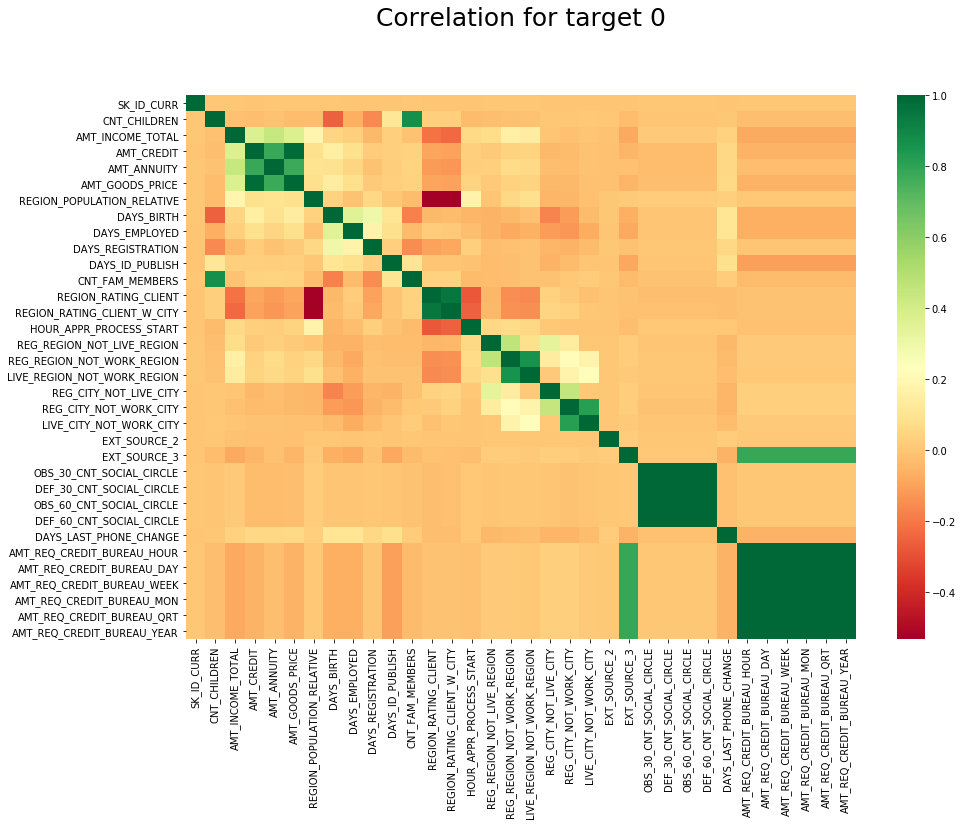

In [69]:
targetsCorr(data=Numeric_col_T0,title='Correlation for target 0')

## Top Correlation for Non Defaulter Population

1. AMT_GOODS_PRICE- AMT_CREDIT
2. CNT_FAM_MEMBERS- CNT_CHILDREN
3. AMT_CREDIT- AMT_ANNUITY
4. AMT_ANNUITY- AMT_GOODS_PRICE
5. REGION_POPULATION_RELATIVE- REGION_RATING_CLIENT_W_CITY
6. REGION_RATING_CLIENT- REGION_POPULATION_RELATIVE
7. AMT_REQ_CREDIT_BUREAU_DAY- EXT_SOURCE_3

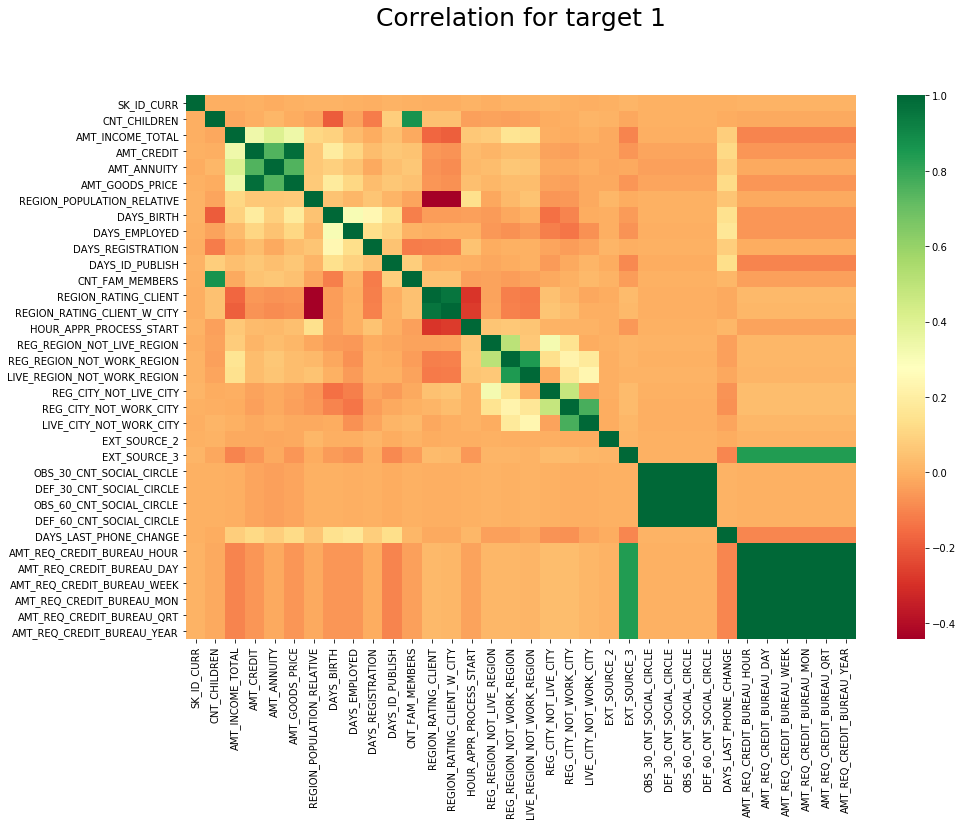

In [70]:
targetsCorr(data=Numeric_col_T1,title='Correlation for target 1')

## Top correlations for Default population

1. AMT_GOODS_PRICE- AMT_CREDIT
2. CNT_FAM_MEMBERS- CNT_CHILDREN
3. AMT_CREDIT- AMT_ANNUITY
4. AMT_ANNUITY- AMT_GOODS_PRICE
5. REGION_POPULATION_RELATIVE- REGION_RATING_CLIENT_W_CITY
6. REGION_RATING_CLIENT- REGION_POPULATION_RELATIVE
7. AMT_REQ_CREDIT_BUREAU_DAY- EXT_SOURCE_3

### Top correlations in both the Default and non default population are same

### Bivariate analysis for numerical variable for Application_Data

In [123]:
def plotBivarAnalysisN2N(x,y):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=x, y=y,data=application_data_T0)
    plt.title('%s'%x+' vs '+'%s' %y+' for Non-Defaulters', fontsize=12)
    plt.xlabel(x)
    plt.xticks(rotation=90)
    
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=x, y=y,data=application_data_T1)
    plt.title('%s' %x+' vs '+'%s' %y+' for Defaulters', fontsize=12)
    plt.xlabel(x)
    plt.xticks(rotation=90)
    plt.show()

In [124]:
def plotBivarAnalysisBarN2C(x,y):
    sns.set_palette("muted")
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    sns.barplot(x=x, y=y,data=application_data_T0.sort_values(by=[x]))
    plt.title('%s'%x+' vs '+'%s' %y+' for Non-Defaulters', fontsize=12)
    plt.xlabel(x)
    plt.xticks(rotation=90)
    
    plt.subplot(1, 2, 2)
    sns.barplot(x=x, y=y,data=application_data_T1.sort_values(by=[x]))
    plt.title('%s' %x+' vs '+'%s' %y+' for Defaulters', fontsize=12)
    plt.xlabel(x)
    plt.xticks(rotation=90)
    plt.show()

In [125]:
def plotBivarAnalysisBoxN2C(x,y):
    sns.set_palette("muted")
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=x, y=y,data=application_data_T0.sort_values(by=[x]))
    plt.title('%s'%x+' vs '+'%s' %y+' for Non-Defaulters', fontsize=12)
    plt.xlabel(x)
    plt.xticks(rotation=90)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=x, y=y,data=application_data_T1.sort_values(by=[x]))
    plt.title('%s' %x+' vs '+'%s' %y+' for Defaulters', fontsize=12)
    plt.xlabel(x)
    plt.xticks(rotation=90)
    plt.show()

In [126]:
def plotBivarAnalysisC2C(x,y):
    sns.set_palette("muted")
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    sns.countplot(x=x,hue=y,data=application_data_T0.sort_values(by=[x]))
    plt.title('%s'%x+' vs '+' for Non-Defaulters', fontsize=12)
    plt.xlabel(x)
    plt.xticks(rotation=90)
    
    plt.subplot(1, 2, 2)
    sns.countplot(x=x,hue=y,data=application_data_T1.sort_values(by=[x]))
    plt.title('%s' %x+' vs '+'for Defaulters', fontsize=12)
    plt.xlabel(x)
    plt.xticks(rotation=90)
    plt.show()

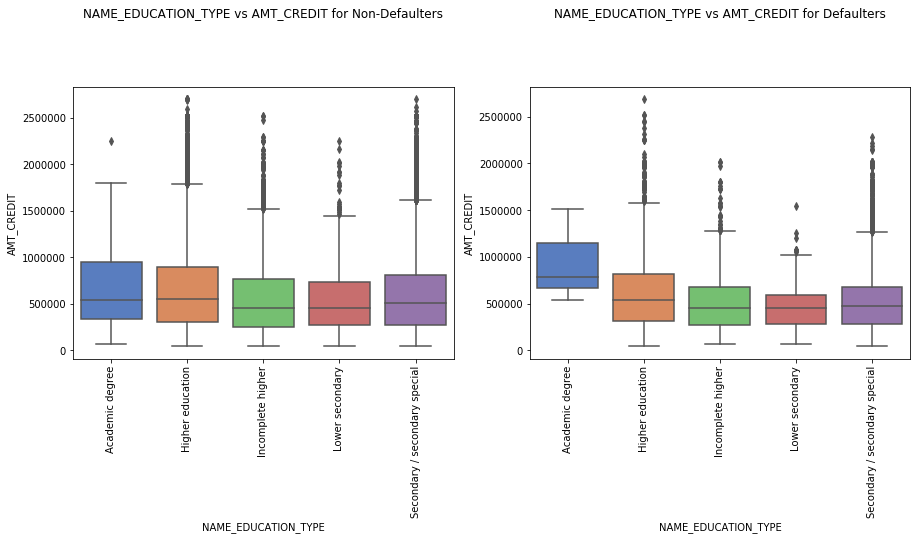

In [75]:
plotBivarAnalysisBoxN2C('NAME_EDUCATION_TYPE','AMT_CREDIT')

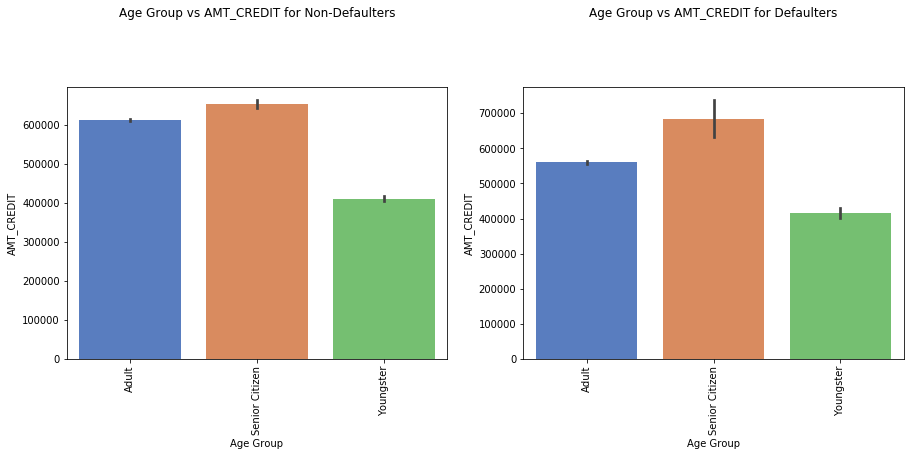

In [128]:
plotBivarAnalysisBarN2C('Age Group','AMT_CREDIT')

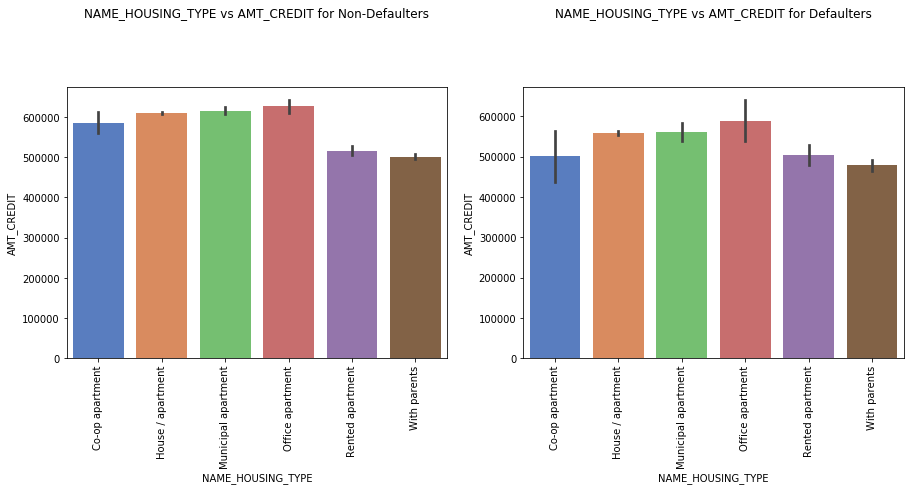

In [77]:
plotBivarAnalysisBarN2C('NAME_HOUSING_TYPE','AMT_CREDIT')

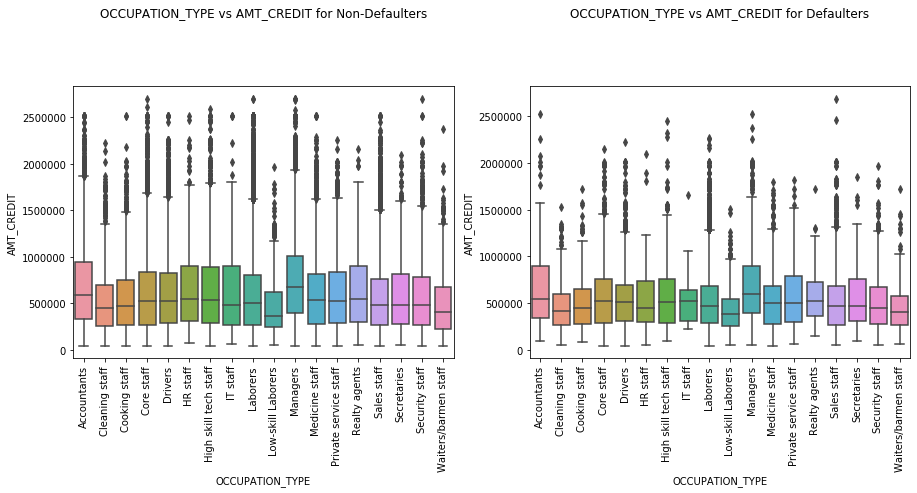

In [78]:
plotBivarAnalysisBoxN2C('OCCUPATION_TYPE','AMT_CREDIT')

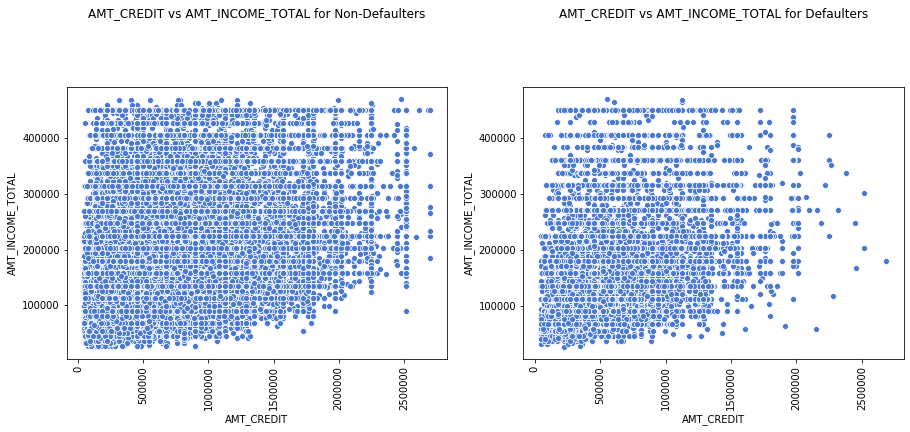

In [79]:
plotBivarAnalysisN2N('AMT_CREDIT','AMT_INCOME_TOTAL')

#### Observation
1. Lower desity of defaults where income is higher than 300k or credit is lower than 200k.

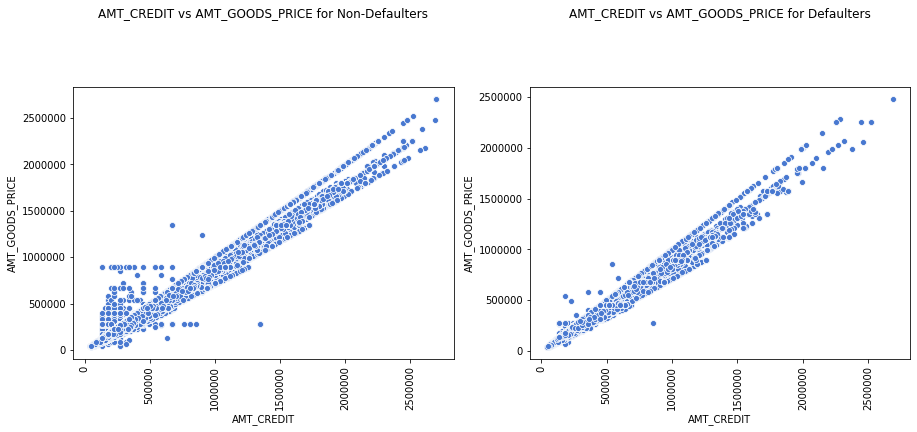

In [80]:
plotBivarAnalysisN2N('AMT_CREDIT','AMT_GOODS_PRICE')

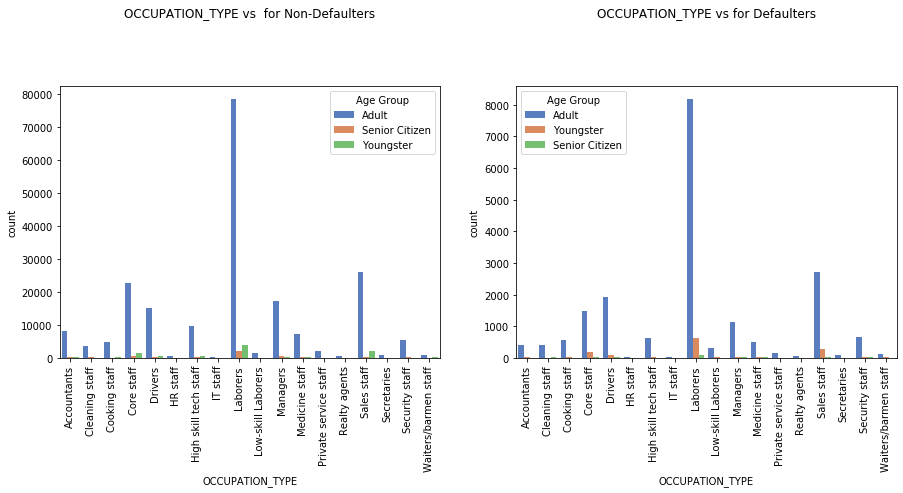

In [81]:
plotBivarAnalysisC2C('OCCUPATION_TYPE','Age Group')

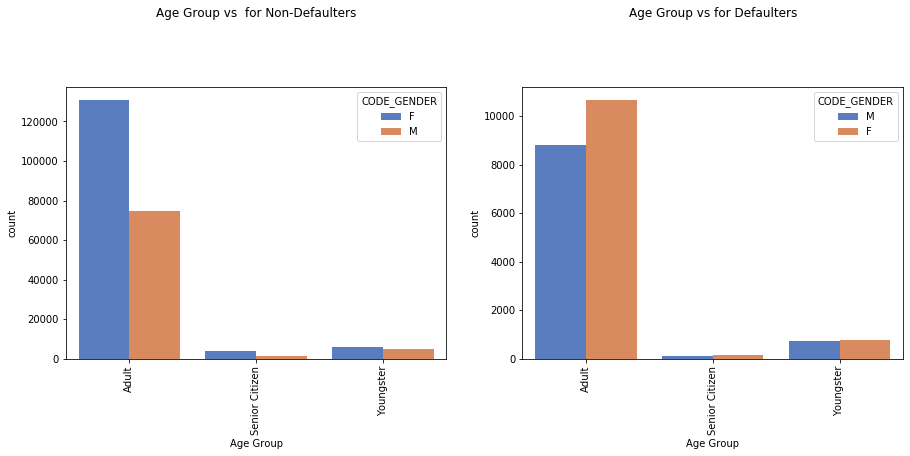

In [130]:
plotBivarAnalysisC2C('Age Group','CODE_GENDER')

#### Observation

Among adults, the ratio of number of females to number of males is higher in non-defauler group as compare to defaulter group. while no such major difference for senior citizens and youngsters.Hence adult women (25-60) is the group which is least slightly to default.


## Merge 2 datasets and perform analysis

In [82]:
Merged_Data=pd.merge(left=application_data,right=previous_application,how='inner',on='SK_ID_CURR')

In [83]:
Merged_Data.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.101083e+06,1.101083e+06,1.101083e+06,1.101083e+06,1.101083e+06,1.101083e+06,1.101083e+06,1.101083e+06,1.101083e+06,1.101083e+06,1.101083e+06,1.101083e+06,1.101083e+06,1.101083e+06,1.101083e+06,1.101083e+06,1.101083e+06,1.101083e+06,1.101083e+06,1.101083e+06,1.101083e+06,1.101083e+06,1.101083e+06,1.101083e+06,1.101083e+06,1.101083e+06,1.101083e+06,1.101083e+06,1.101083e+06,1.101083e+06,1.101083e+06,1.101083e+06,1.101083e+06,1.101083e+06,1.101083e+06,1.101083e+06,1.101083e+06,1.101083e+06,1.101083e+06,1.101083e+06,1.101083e+06,1.101083e+06,1.101083e+06
mean,2.784998e+05,4.487155e-01,1.734881e+05,5.893583e+05,2.707276e+04,5.281842e+05,2.061182e-02,1.499240e+04,2.451522e+03,4.666962e+03,2.822487e+03,2.212977e+00,2.057447e+00,2.035147e+00,1.211924e+01,1.341134e-02,5.337654e-02,4.370243e-02,8.602440e-02,2.756450e-01,2.153580e-01,3.325093e+02,4.748168e+04,6.321867e+02,6.307957e+02,6.321687e+02,6.307506e+02,1.088128e+03,3.205828e+04,3.205829e+04,3.205831e+04,3.205856e+04,3.205859e+04,3.206077e+04,1.922561e+06,4.242843e+05,1.712975e+05,1.931165e+05,5.977617e+05,1.264913e+01,8.851457e+02,3.232480e+02,4.120019e+05
std,1.028412e+05,6.814359e-01,7.663485e+04,3.766797e+05,1.272825e+04,3.446570e+05,1.310707e-02,3.652364e+03,2.320074e+03,3.279541e+03,1.515177e+03,8.584899e-01,4.952986e-01,4.885150e-01,3.270455e+00,1.150282e-01,2.247833e-01,2.044323e-01,2.804002e-01,4.468389e-01,4.110706e-01,9.604793e+03,1.046656e+05,1.323054e+04,1.323060e+04,1.323054e+04,1.323061e+04,8.013606e+02,8.883102e+04,8.883102e+04,8.883101e+04,8.883093e+04,8.883091e+04,8.883013e+04,5.326482e+05,7.827233e+05,2.911594e+05,3.175725e+05,7.595436e+05,3.356869e+00,7.834299e+02,6.792161e+03,7.890226e+05
min,1.000020e+05,0.000000e+00,2.565000e+04,4.500000e+04,1.980000e+03,4.050000e+04,2.900000e-04,7.489000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.173617e-08,5.272652e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000001e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00
25%,1.893000e+05,0.000000e+00,1.125000e+05,2.786130e+05,1.726200e+04,2.475000e+05,1.003200e-02,1.198800e+04,8.390000e+02,1.856000e+03,1.523000e+03,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.932711e-01,3.672910e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.010000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.461404e+06,7.175655e+03,2.061000e+04,2.563650e+04,6.281100e+04,1.000000e+01,2.750000e+02,-1.000000e+00,8.000000e+00
50%,2.789700e+05,0.000000e+00,1.575000e+05,5.099220e+05,2.554200e+04,4.500000e+05,1.885000e-02,1.482900e+04,1.751000e+03,4.290000e+03,2.931000e+03,2.000000e+00,2.000000e+00,2.000000e+00,1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.628056e-01,5.549468e-01,0.000000e+00

In [84]:
Merged_Data.select_dtypes(include='object').columns

Index(['TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START_x', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'Age Group', 'NAME_CONTRACT_TYPE_y', 'WEEKDAY_APPR_PROCESS_START_y', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
  

In [85]:
Merged_Data = Merged_Data[[c for c in Merged_Data.columns if not c.endswith('_x')]]

### Univariate analysis on Merged Data

In [86]:
previous_application.select_dtypes(include='object').columns

Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'], dtype='object')

In [135]:
def uniVariateAnalysis(colname):
    sns.set_palette("muted")
    plt.figure(figsize=(15,5))
    ax=sns.countplot(Merged_Data[colname])
    plt.title('Distribution of '+'%s' %colname+'.', fontsize=14)
    plt.xticks(rotation=90)
    plt.xlabel(colname)
    for p in ax.patches:
        ax.annotate(f'{(p.get_height()/len(Merged_Data[colname])):.2%}', (p.get_x()+0.1, p.get_height()+50),rotation=90)
    plt.show()

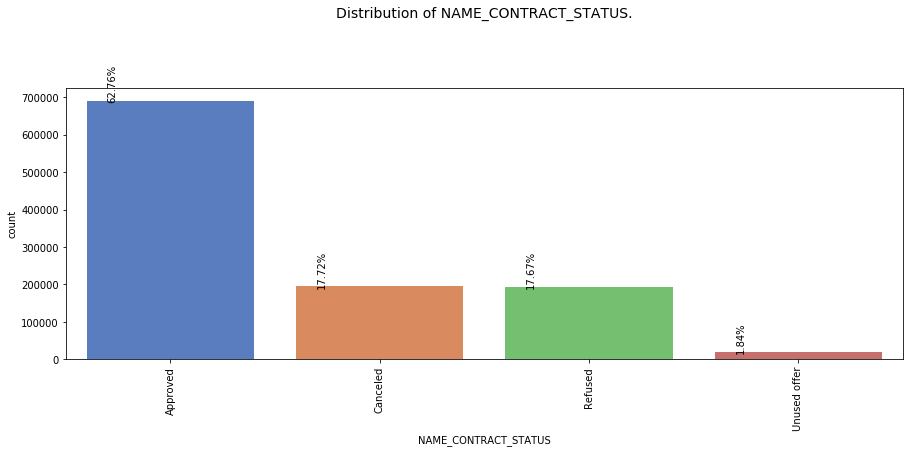

In [136]:
uniVariateAnalysis('NAME_CONTRACT_STATUS')

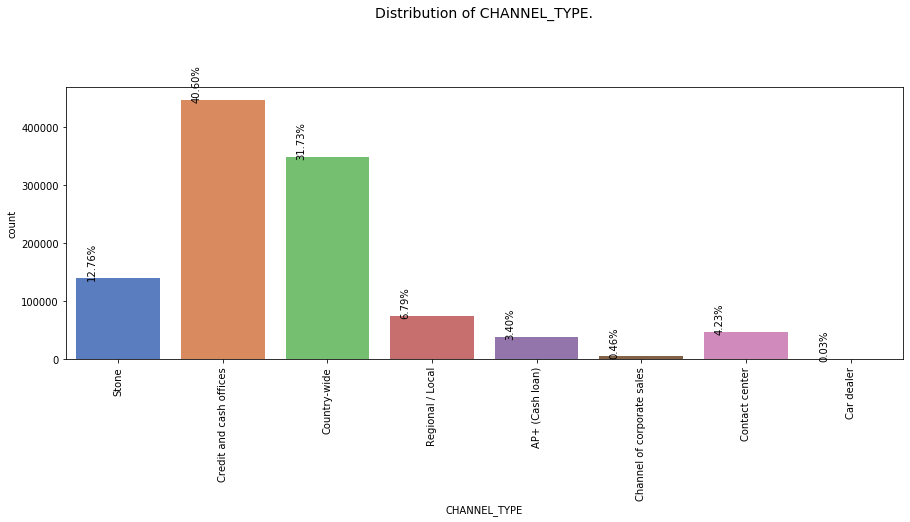

In [137]:
uniVariateAnalysis('CHANNEL_TYPE')

#### Observation
1.  Credit and Cash Offices and Country wide are the channel through which we acquire maximum number of clients

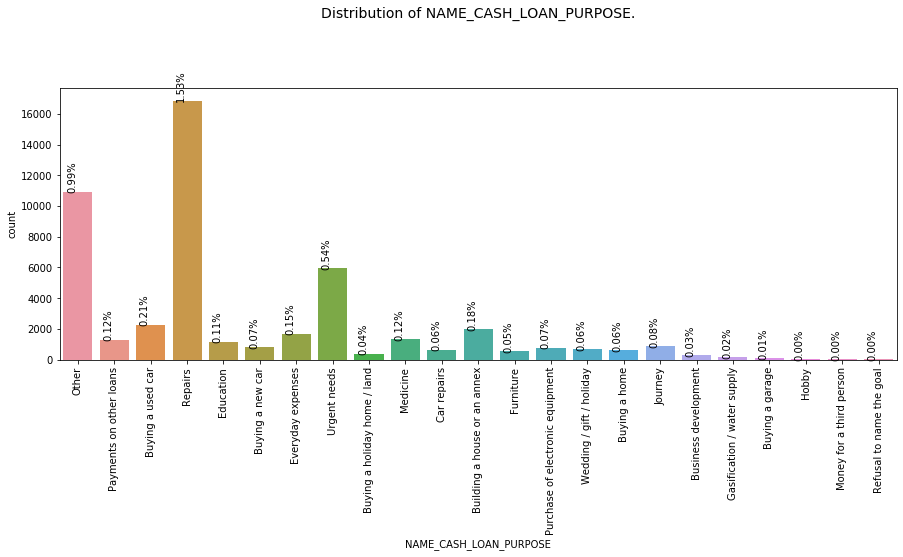

In [138]:
uniVariateAnalysis('NAME_CASH_LOAN_PURPOSE')

### Bivariate analysis on Merged Data

In [91]:
def biVariateAnalysis(col1,col2):
    sns.set_palette("muted")
    plt.figure(figsize=(15,7))
    ax=sns.countplot(x=col1, data=Merged_Data,hue=col2)
    plt.title('Distribution of '+'%s' %col1+' vs '+'%s' %col2+'.', fontsize=14)
    plt.xlabel(col1)
    plt.xticks(rotation=90)
    plt.ylabel(col2)
    for p in ax.patches:
        ax.annotate(f'{(p.get_height()/len(Merged_Data)):.2%}', (p.get_x()+0.1, p.get_height()+50),rotation=90)

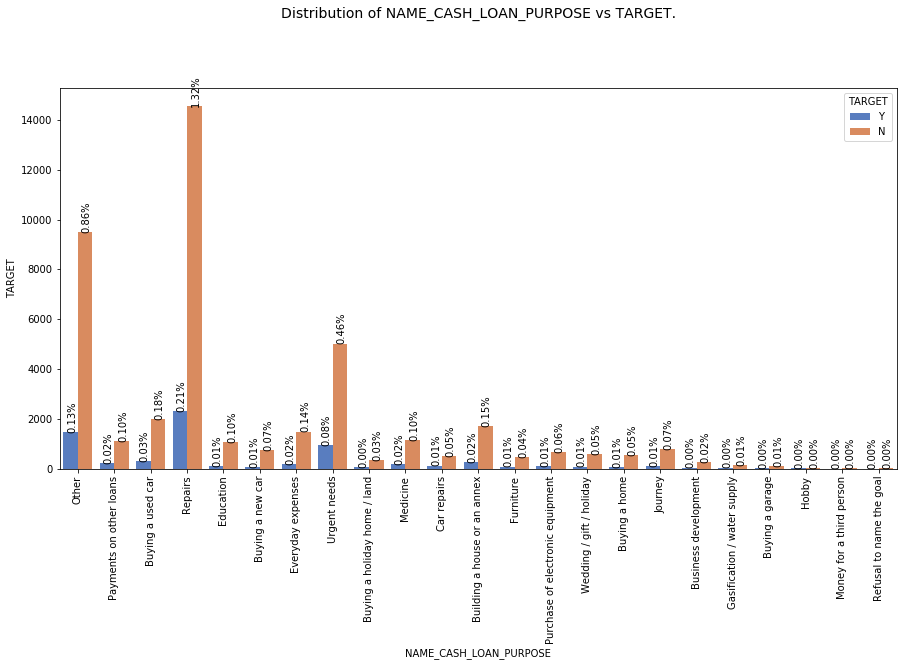

In [118]:
biVariateAnalysis('NAME_CASH_LOAN_PURPOSE','TARGET')

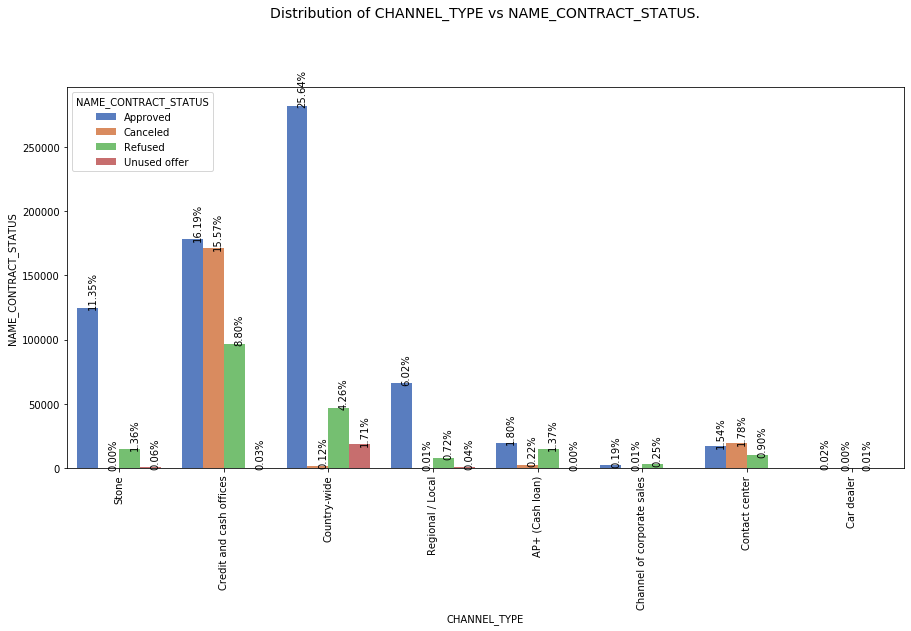

In [93]:
biVariateAnalysis('CHANNEL_TYPE','NAME_CONTRACT_STATUS')

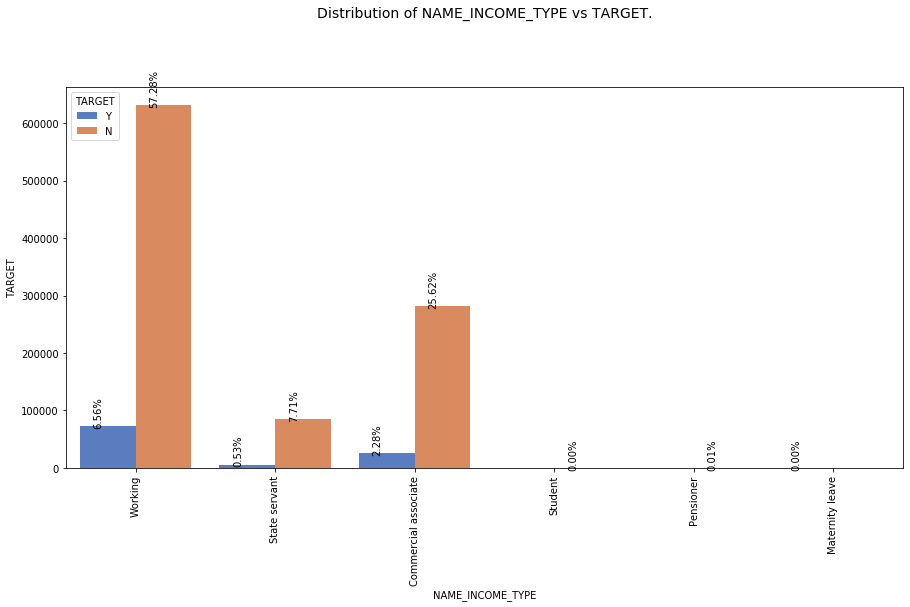

In [114]:
biVariateAnalysis('NAME_INCOME_TYPE','TARGET')

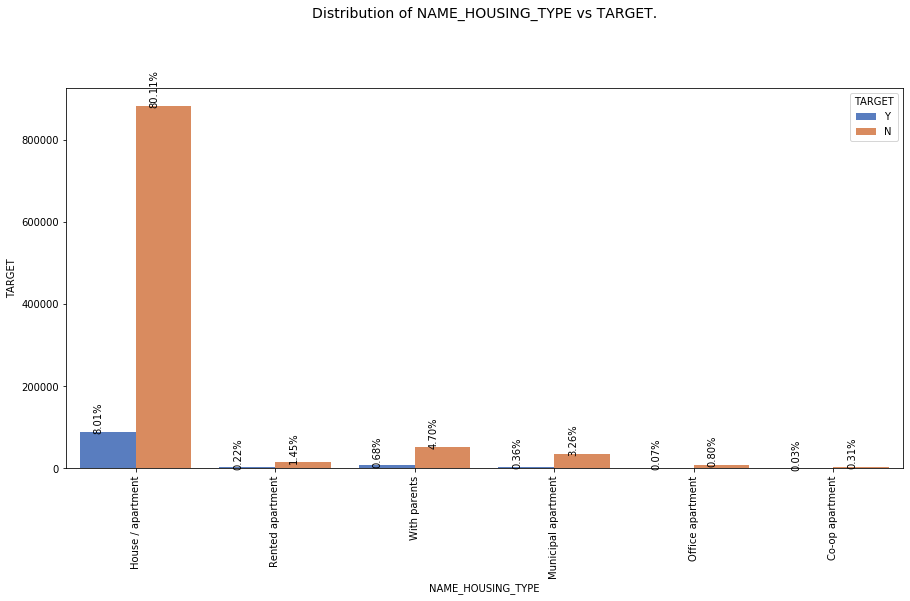

In [115]:
biVariateAnalysis('NAME_HOUSING_TYPE','TARGET')

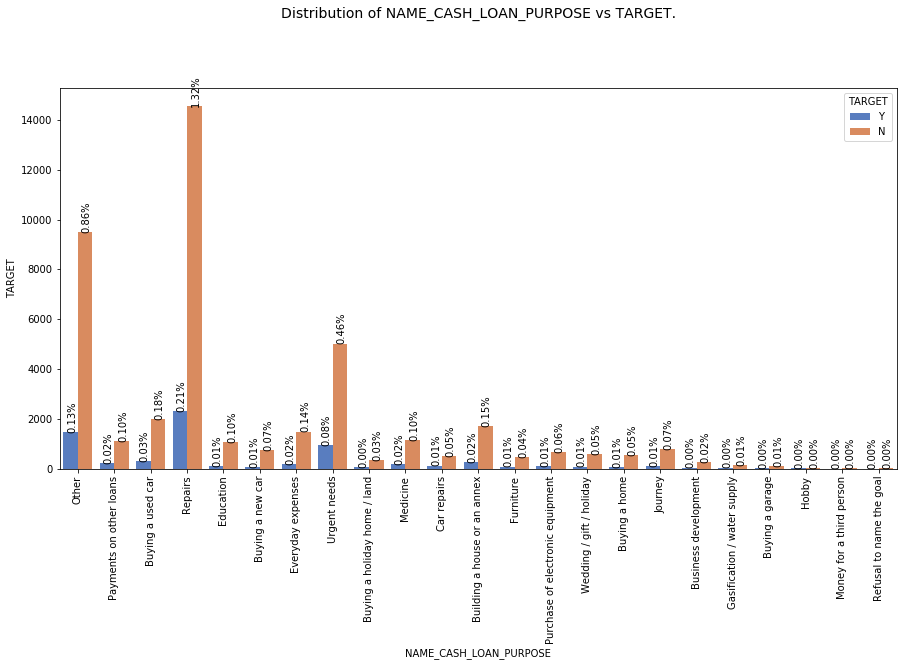

In [116]:
biVariateAnalysis('NAME_CASH_LOAN_PURPOSE','TARGET')

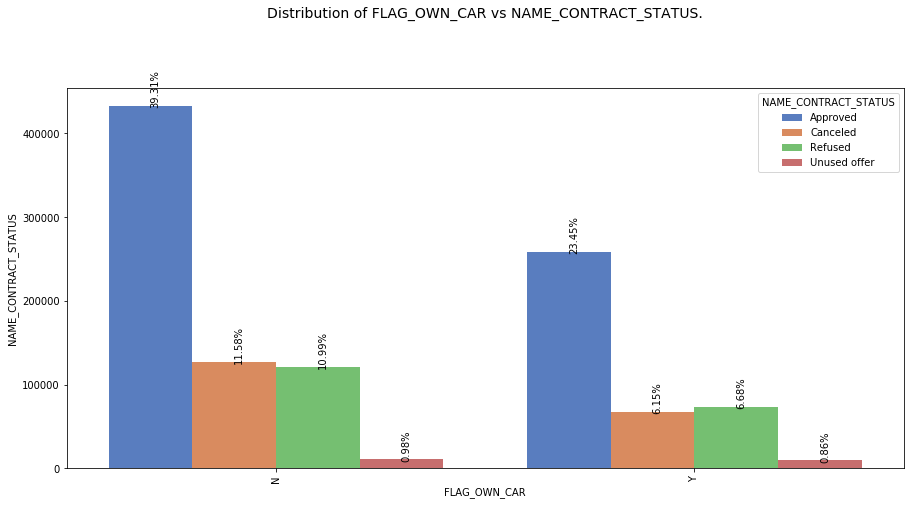

In [109]:
biVariateAnalysis('FLAG_OWN_CAR','NAME_CONTRACT_STATUS')

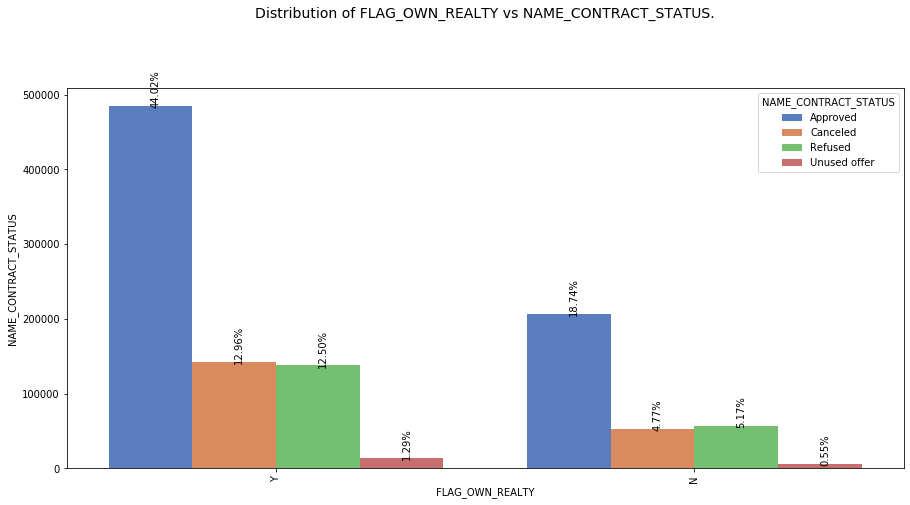

In [112]:
biVariateAnalysis('FLAG_OWN_REALTY','NAME_CONTRACT_STATUS')

#### Observation -

People who live in there own houses, their loan gets approved in much more cases. This is because they dont have rent liabilities and also shows strong finances.

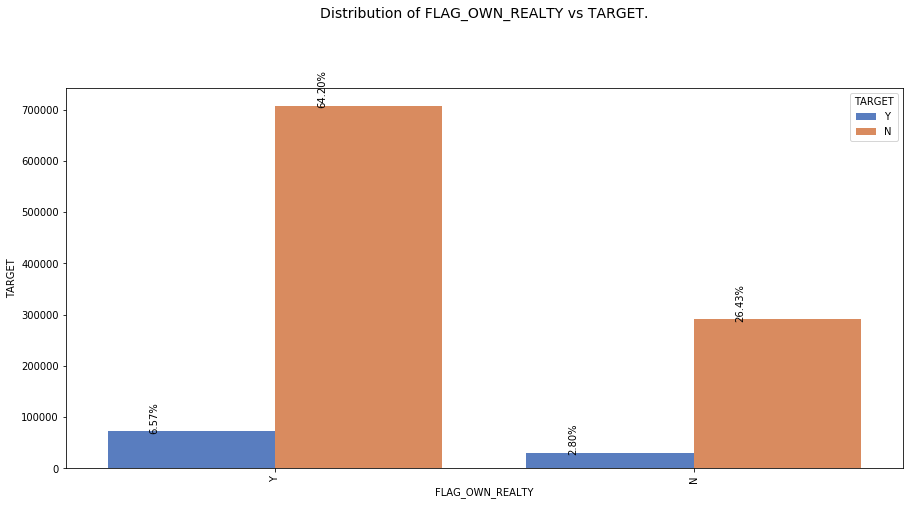

In [113]:
biVariateAnalysis('FLAG_OWN_REALTY','TARGET')

# Conclusion


1. Among adults, the ratio of number of females to number of males is higher in non-defaulter group as compare to defaulter group. while no such major difference for senior citizens and youngsters.Hence adult women (25-60) is the group which is least slightly to default.

2. People who live in there own houses, their loan gets approved in much more cases. This is because they dont have rent liabilities and also shows strong finances.

3. The ratio of people who do not default to the people who do default is highest in the case of people whose payment type is "Cash through the bank".This shows those people should be preferred who make their payment application in the mode of cash through the bank.

4. Also with loan purpose ‘Repair’ is having higher number of defaulters.

5. Get as much as clients from housing type ‘With parents’ as they are having least number of defaulters.

6. Maximum reason for taking loan appears to be ‘Repair’ ~8% followed by ‘Urgent Needs’. ‘Urgent Needs’ cases loans can be provided at slightly higher interest rate.


